In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import seaborn as sns
from matplotlib import pyplot

In [2]:
df = pd.read_csv("pgaTourData.csv")
df["Wins"] = df["Wins"].fillna(0)
df1 = pd.read_csv("vettel.csv")
print(df)
plt.rcParams["figure.figsize"] = (15, 10)

             Player Name  Rounds  Fairway Percentage  Year  Avg Distance  \
0         Henrik Stenson    60.0               75.19  2018         291.5   
1            Ryan Armour   109.0               73.58  2018         283.5   
2            Chez Reavie    93.0               72.24  2018         286.5   
3             Ryan Moore    78.0               71.94  2018         289.2   
4           Brian Stuard   103.0               71.44  2018         278.9   
...                  ...     ...                 ...   ...           ...   
2307        Carl Paulson     NaN                 NaN  2012           NaN   
2308      Peter Tomasulo     NaN                 NaN  2012           NaN   
2309        Marc Turnesa     NaN                 NaN  2010           NaN   
2310     Jesper Parnevik     NaN                 NaN  2010           NaN   
2311  Jim Gallagher, Jr.     NaN                 NaN  2010           NaN   

        gir  Average Putts  Average Scrambling  Average Score Points  Wins  \
0     73.

Context: Plotting data using the strategy


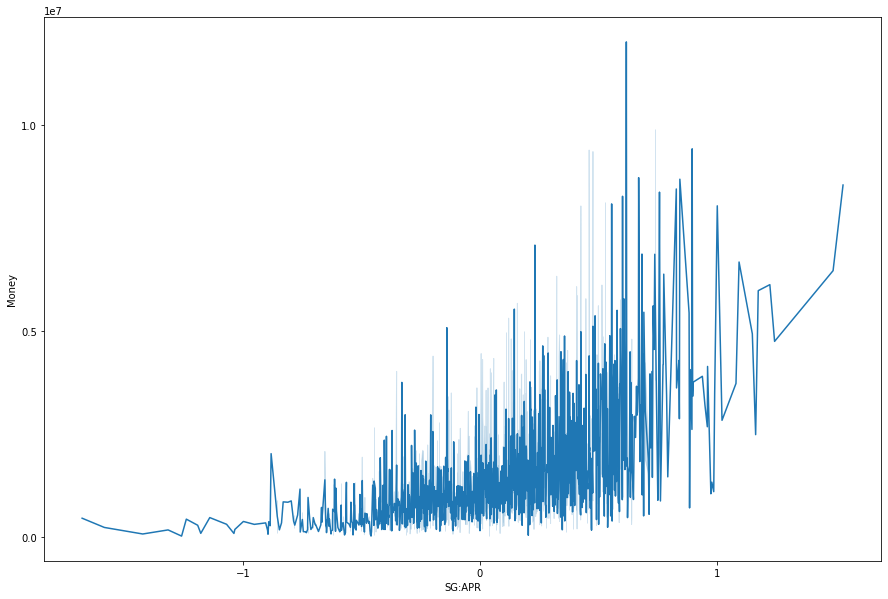

In [14]:
import seaborn as sns


class PlotStrategy():
    def plot(self, col1, col2, df, h):
        pass


class Context():
    def __init__(self, strategy: PlotStrategy, df):
        self._strategy = strategy
        self._df = df

    def getStrategy(self):
        return self._strategy

    def setStrategy(self, strategy):
        self._strategy = strategy

    def getDataFrame(self):
        return self._df

    def setDataFrame(self, df):
        self._df = df

    def plot(self, col1, col2, h = None):
        print("Context: Plotting data using the strategy")
        self._strategy.plot(col1, col2, self.getDataFrame(), h)

    # Manipulate dataset functions

    def filterByRows(self, column, values):
        self.setDataFrame(
            self.getDataFrame().loc[self.getDataFrame()[column].isin(values)])

    def sortByColumn(self, column, a):
        self.setDataFrame(self.getDataFrame().sort_values(
            by=[column], ascending=a))

    def removeCharFromColumn(self, char, column):
        self.getDataFrame()[column] = self.getDataFrame()[
            column].str.replace(char, '')

    def convertToFloat(self, column):
        self.getDataFrame()[column] = self.getDataFrame()[column].astype(float)

    def aggregate(self, group, ag_func):
        newDf = self.getDataFrame().groupby(
            self.getDataFrame()[group]).aggregate(ag_func)
        self.setDataFrame(newDf)

    def headN(self, N):
        self.setDataFrame(self.getDataFrame().head(N))
        
    def setNoBins(self, x, y):
        pyplot.locator_params(axis='y', nbins=y)
        pyplot.locator_params(axis='x', nbins=x)


class ScatterStrategy(PlotStrategy):
    def plot(self, col1, col2, df, h):
        return sns.scatterplot(x=col1, y=col2, data=df, hue=h, size=h, sizes=(30, 200)) 

class ScatterRegStrategy(PlotStrategy):
    def plot(self, col1, col2, df, h):
        return sns.regplot(x=col1, y=col2, data=df, fit_reg=True, line_kws={'color': 'red'}).set(xlim=(0,21))

class LineStrategy(PlotStrategy):
    def plot(self, col1, col2, df, h):
        return sns.lineplot(x=col1, y=col2, data=df, hue=h, size=h)


class BarStrategy(PlotStrategy):
    def plot(self, col1, col2, df, h):
        return sns.catplot(data=df, kind="bar", x=col1, y=col2, hue=h)


if __name__ == "__main__":


    #pga.removeCharFromColumn(',', "Money")
    #pga.removeCharFromColumn('$', "Money")
    #pga.convertToFloat("Money")
    #pga.removeCharFromColumn(',', "Points")
    #pga.convertToFloat("Points")
    
    pga = Context(LineStrategy(), df)
    pga.setNoBins(3, 3)
    pga.plot("SG:APR", "Money")
    
    
    #df1 = pd.read_csv("vettel.csv")
    #f1 = Context(ScatterRegStrategy(), df1)
    #f1.plot("grid", "position")
    
    
